# <a>Nuvens de Palavras</a>

As nuvens de palavras são bem úteis para termos uma visão geral de um grande volume de palavras ou textos. Convenhamos que dá um up na sua apresentação na firma!


---

O Let's Data produz conteúdos gratuitos sobre Data Science!

Confira algumas das nossa produções:

* [Livro Digital - Como se tornar um Cientista de Dados?](https://ebook.letsdata.ai/)
* [Inscreva-se no canal no YouTube](https://www.youtube.com/c/LetsDataAI?sub_confirmation=1)
* [Siga-nos no Instagram](https://www.instagram.com/letsdata.ai)
* Ouça nosso Podcast no [Spotify](https://open.spotify.com/show/0VsNN95jsJVRS424eCFDlg?si=EvQ1KBq1SqGVD4ojHrx4eQ), [Google Podcast](https://podcasts.google.com/feed/aHR0cHM6Ly9mZWVkcy5idXp6c3Byb3V0LmNvbS8xNzMxMjUyLnJzcw), [Apple Podcasts](https://podcasts.apple.com/us/podcast/lets-data-podcast/id1559072194), [Castbox](https://castbox.fm/vic/1559072194), [Deezer](https://www.deezer.com/show/2770422) e demais players. 
* Também estamos no [LinkedIn](https://linkedin.com/company/lets-data), [Twitter](https://twitter.com/letsdataAI), [Facebook](https://www.facebook.com/letsdataAI/).
* [Pra finalizar, nosso blog no Medium](https://medium.com/lets-data).

---

In [ ]:
!pip install notebook wordcloud pillow numpy bs4 tqdm

### <a>Primeiramente, vamos buscar as músicas do Radiohead</a>

O site utilizado para buscar as palavras foi o [MLDB](http://www.mldb.org/)

Vamos utilizar o requests e o beautiful soup. Para mais detalhes, temos um vídeo mais detalhado de scraping [aqui](https://www.youtube.com/watch?v=aNtzKGTujuA)

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests


In [2]:
url_base = 'http://www.mldb.org'

In [3]:
# Simulando a requisição passando um user-agent (para 'enganar' a página)
artista = 'artist-746-radiohead.html'
req = requests.get(f'{url_base}/{artista}', headers={'User-Agent': 'Mozilla/5.0'})

In [4]:
pagina = req.text

pagina

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<title>MLDb, The Music Lyrics Database - List of songs of Radiohead by albums</title>\n<meta name="Author" content="Nikolay Pelov, NickSoft" />\n<meta name="Description" content="List of songs of Radiohead by albums" />\n<meta name="Keywords" content="music,song,lyrics,mldb,artist,group,performer,Radiohead,B-SIDES,My Iron Lung [EP],Pablo Honey,My Iron Lung,The Bends,Ok Computer,Kid A,Amnesiac,Hail To The Thief,In Rainbows,Twilight Soundtrack," />\n<meta name="robots" content="index,follow" />\n<meta name="revisit-after" content="7 days" />\n<meta name="title" content="MLDb, The Music Lyrics Database - List of songs of Radiohead by albums" />\n<meta name="distribution" content="Global" />\n<meta name="rating" content="general" />\n<link href="style.css" media="all" type="text/css" rel="sty

In [5]:
sopao = BeautifulSoup(pagina, 'html.parser')

sopao

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>MLDb, The Music Lyrics Database - List of songs of Radiohead by albums</title>
<meta content="Nikolay Pelov, NickSoft" name="Author"/>
<meta content="List of songs of Radiohead by albums" name="Description"/>
<meta content="music,song,lyrics,mldb,artist,group,performer,Radiohead,B-SIDES,My Iron Lung [EP],Pablo Honey,My Iron Lung,The Bends,Ok Computer,Kid A,Amnesiac,Hail To The Thief,In Rainbows,Twilight Soundtrack," name="Keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="7 days" name="revisit-after"/>
<meta content="MLDb, The Music Lyrics Database - List of songs of Radiohead by albums" name="title"/>
<meta content="Global" name="distribution"/>
<meta content="general" name="rating"/>
<link href="style.css" media="all" rel="stylesheet" type="text/css"/>
<link hre

In [6]:
# Extraindo links das músicas
links_musicas = sopao.find_all('a', {'href': re.compile(r'song-*')} )

len(links_musicas)

148

In [8]:
links_musicas[50]

<a href="song-22021-the-bends.html">The Bends</a>

In [9]:
!pip install tqdm


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from tqdm import tqdm

letras_radiohead = ''

with open('./data/lyrics_radiohead.txt', 'w') as arquivo_letras:
    for link_musica in tqdm(links_musicas):
        url_musica = link_musica['href']
        url_completa = f'{url_base}/{url_musica}'

        req = requests.get(url_completa, headers={'User-Agent': 'Mozilla/5.0'})

        sopao_musica = BeautifulSoup(req.text, 'html.parser')

        letra = sopao_musica.find('p', {'class': 'songtext'} )
        
        arquivo_letras.write(f'{letra.text}\n')
        
        letras_radiohead += f'{letra.text}\n'


100%|██████████████████████████████████████████████████████████████████████████| 148/148 [01:18<00:00,  1.89it/s]


In [12]:
letras_radiohead[100:150]

'comes up from the sewers\nAnd glows in the dark\n\nBa'

In [13]:
# Organizar numa lista de palavras
tokens = letras_radiohead.split()

In [14]:
len(tokens)

18074

In [17]:
tokens[40]

'Anything'

In [18]:
# Conversão em minusculo
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower().strip()

tokens[40]

'anything'

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [27]:
tokens[:10]

["there's",
 'a',
 'little',
 'child',
 'running',
 'round',
 'this',
 'house',
 'and',
 'he']

In [29]:
# Preparando para wordcloud: uma STRINGZONA só com todas as palavras
palavras_radiohead = " ".join(tokens)

palavras_radiohead[:100]

"there's a little child running round this house and he never leaves he will never leave and the fog "

In [53]:
# Sem máscara
wordcloud = WordCloud(background_color = 'white',
                #stopwords = stopwords_customizada,
                #contour_width = 1,
                #contour_color  = 'white',
                #colormap='Purples',
                random_state=42).generate(palavras_radiohead)

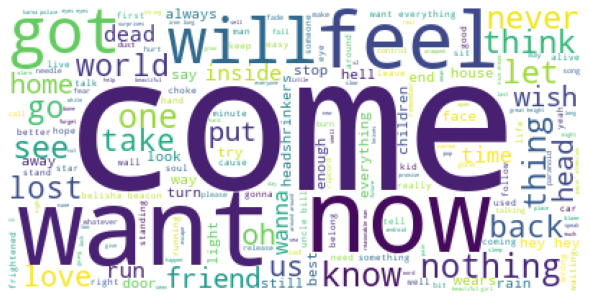

In [54]:
# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [38]:
# Abrir imagem com o pillow (pil Image)
# Buscar a mascara da imagem
imagem_mascara = np.array(Image.open("./img/mapa_radiohead.jpg"))

imagem_mascara

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [43]:
wordcloud = WordCloud(background_color = 'black',
                    max_words = 1000,
                    mask=imagem_mascara,
                    #colormap='Purples',
                    random_state=42).generate(palavras_radiohead)

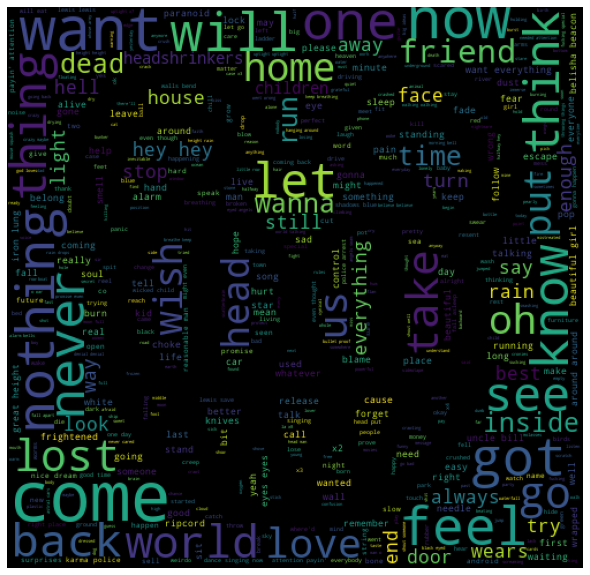

In [44]:
# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [45]:
from collections import Counter

radiohead_count = Counter(tokens)

radiohead_count.most_common()

[('the', 757),
 ('i', 675),
 ('you', 616),
 ('and', 452),
 ('a', 355),
 ('to', 328),
 ('in', 275),
 ('me', 266),
 ('it', 204),
 ('my', 203),
 ('your', 197),
 ("i'm", 174),
 ('all', 168),
 ('is', 163),
 ('on', 159),
 ('out', 148),
 ('of', 141),
 ("don't", 140),
 ('that', 129),
 ('up', 122),
 ('be', 116),
 ('we', 115),
 ('but', 114),
 ('can', 108),
 ('no', 106),
 ('down', 104),
 ('not', 103),
 ('are', 102),
 ('this', 98),
 ('get', 96),
 ('if', 95),
 ('for', 94),
 ('just', 83),
 ('what', 83),
 ('with', 83),
 ('when', 79),
 ('so', 77),
 ("you're", 76),
 ("it's", 76),
 ('there', 74),
 ('want', 73),
 ('they', 71),
 ('come', 68),
 ('do', 67),
 ('now', 66),
 ('like', 65),
 ('from', 60),
 ("can't", 60),
 ('will', 53),
 ('back', 53),
 ('again', 53),
 ('at', 52),
 ('got', 51),
 ('off', 50),
 ('never', 49),
 ('am', 49),
 ('go', 48),
 ('feel', 46),
 ('one', 46),
 ('how', 45),
 ('let', 45),
 ('world', 44),
 ('nothing', 43),
 ('here', 43),
 ('her', 42),
 ('he', 41),
 ('into', 41),
 ('think', 41),
 ('

In [46]:
stopwords_customizada = STOPWORDS.union({'go', 'got', 'oh', 'hey', 'now', 'thing', 'will', 'things', 'one'})

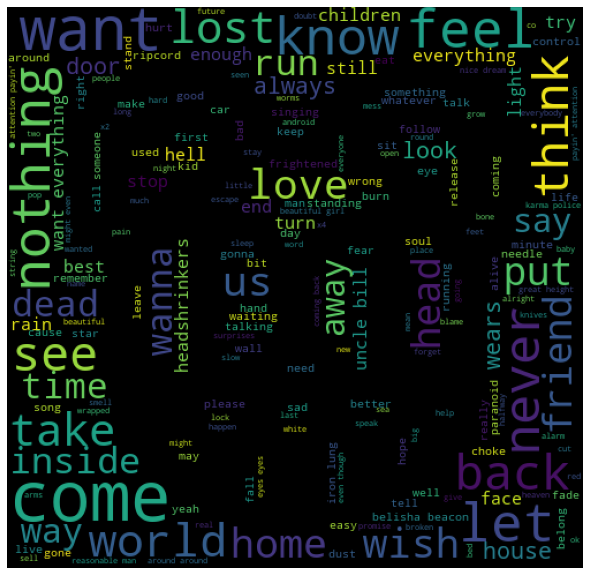

In [47]:
wordcloud = WordCloud(background_color = 'black',
                stopwords = stopwords_customizada,
                mask=imagem_mascara,
                #colormap='Purples',
                random_state=42).generate(palavras_radiohead)

# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

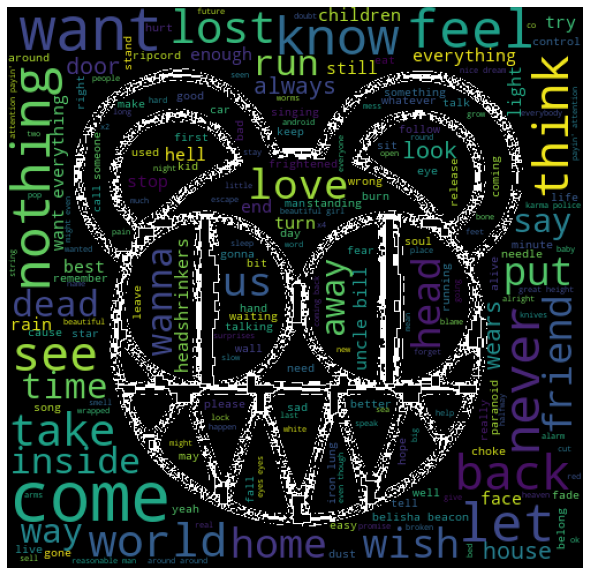

In [56]:
wordcloud = WordCloud(background_color = 'black',
                stopwords = stopwords_customizada,
                contour_width = 1,
                contour_color  = 'white',
                mask=imagem_mascara,
                #colormap='Purples',
                random_state=42).generate(palavras_radiohead)

# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [57]:
wordcloud.to_file('./wordclouds/radiohead2.png')